In [4]:
import pandas as pd
import numpy as np
data=pd.read_csv("TESLA.csv")
data

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,6/29/10,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,1,6/30/10,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2,7/1/10,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,3,7/2/10,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,4,7/6/10,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...,...
3632,3632,12/3/24,351.799988,355.690002,348.200012,351.420013,351.420013,58267200
3633,3633,12/4/24,353.000000,358.100006,348.600006,357.929993,357.929993,50810900
3634,3634,12/5/24,359.869995,375.429993,359.500000,369.489990,369.489990,81403600
3635,3635,12/6/24,377.420013,389.489990,370.799988,389.220001,389.220001,81455800


In [6]:
data['Date'] = pd.to_datetime(data['Date'],format='%m/%d/%y')
data.set_index('Date', inplace=True)
data=data.drop('Unnamed: 0',axis=1)

In [8]:
data=data[['Close']]

In [10]:
from sklearn.preprocessing import MinMaxScaler
mmc=MinMaxScaler(feature_range=(0,1))
scaled_data=mmc.fit_transform(data)

In [12]:
time_steps=60

In [16]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Collecting tensorflow
     ---------------------------------------- 0.0/48.6 kB ? eta -:--:--
     ---------------------------------------- 48.6/48.6 kB 2.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/390.3 MB 4.1 MB/s eta 0:01:36
   ---------------------------------------- 0.2/390.3 MB 2.8 MB/s eta 0:02:22
   ---------------------------------------- 0.5/390.3 MB 3.5 MB/s eta 0:01:51
   ---------------------------------------- 0.6/390.3 MB 3.7 MB/s eta 0:01:46
   ---------------------------------------- 0.8/390.3 MB 3.5 MB/s eta 0:01:53
   ---------------------------------------- 1.0/390.3 MB 3.3 MB/s eta 0:01:58
   ---------------------------------------- 1.2/390.3 MB 3.4 MB/s eta 0:01:55
   ---------------------------------------- 1.3/390.3 MB 3.4 MB/s eta 0:01:55
   ---------------------------------------- 1.3/390.3 MB 3.4 MB/s 

In [27]:
import tensorflow
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
generator=TimeseriesGenerator(scaled_data,scaled_data,length=time_steps,batch_size=32)

In [28]:
train_size=int(len(scaled_data)*0.8)
train_data=scaled_data[:train_size]
test_data=scaled_data[train_size:]

In [29]:
train_generator=TimeseriesGenerator(train_data,train_data,length=time_steps,batch_size=32)
test_generator=TimeseriesGenerator(test_data,test_data,length=time_steps,batch_size=32)

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Dense,Input
model=Sequential()
model.add(Input(shape=(time_steps,1)))
model.add(LSTM(50,activation='relu'))
model.add(Dense(1))

In [31]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(train_generator,epochs=50,validation_data=test_generator)

Epoch 1/50


C:\Users\lenovo\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.0256 - val_loss: 0.0029
Epoch 2/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 8.0524e-04 - val_loss: 0.0091
Epoch 3/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 7.0064e-04 - val_loss: 0.0031
Epoch 4/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 8.4369e-04 - val_loss: 0.0015
Epoch 5/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 2.6093e-04 - val_loss: 0.0017
Epoch 6/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 3.4748e-04 - val_loss: 0.0015
Epoch 7/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 2.2244e-04 - val_loss: 0.0016
Epoch 8/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 4.2315e-04 - val_loss: 0.0014
Epoch 9/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 1.7164e-04 - val_loss: 0.0019
Epoch 10/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 2.5932e-04 - val_loss: 0.0014
Epoch 11/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 2.3785e-04 - val_loss: 0.0068
Epoch 12/50
90/90 ━━━━━━━━━━━━━━━

In [32]:
predictions=model.predict(test_generator)

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


In [33]:
predictions=mmc.inverse_transform(predictions)
y_test_actual=mmc.inverse_transform(test_data[time_steps:])

Text(0, 0.5, 'Stock Prices')

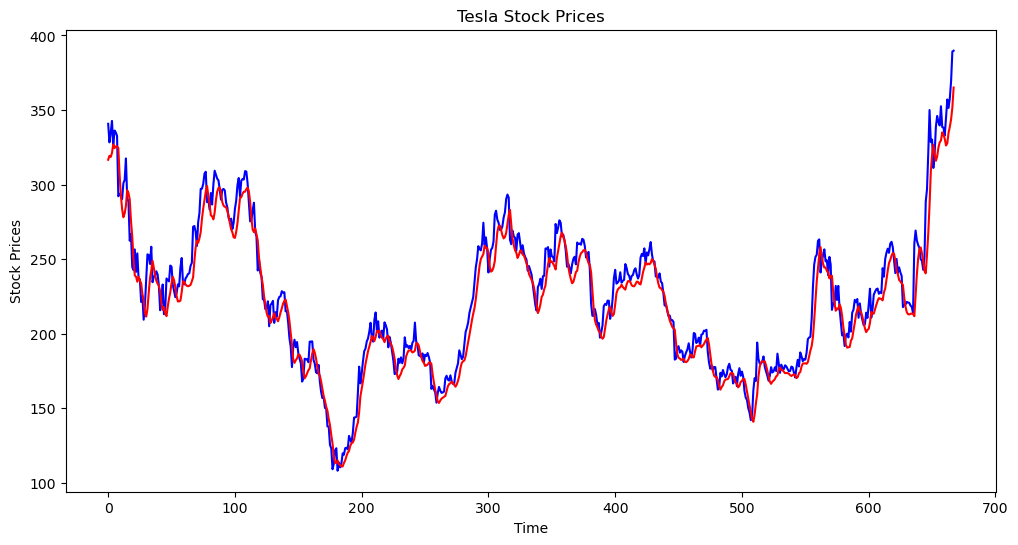

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(y_test_actual,color='blue',label='Actual Tesla Stock Prices')
plt.plot(predictions,color='red',label='Predicted Stock Prices')
plt.title('Tesla Stock Prices')
plt.xlabel('Time')
plt.ylabel("Stock Prices")

In [48]:
from sklearn.metrics import r2_score,mean_squared_error
accuracy=r2_score(predictions,y_test_actual)
mse=mean_squared_error(predictions,y_test_actual)
rmse=np.sqrt(mean_squared_error(predictions,y_test_actual))

In [50]:
print("Accuracy : ",accuracy)
print("Mean Squared error : ",mse)
print("Root Mean Squared error : ",rmse)

Accuracy :  0.9277981382194587
Mean Squared error :  153.27963968431158
Root Mean Squared error :  12.38061548083582
